### Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import joblib  


%matplotlib inline

### Load and check dataset


In [2]:
df = pd.read_csv("pima-data.csv")

In [3]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [5]:
df.shape

(768, 10)

### Definition of features


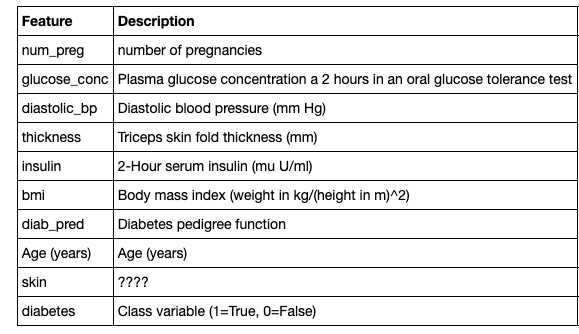

In [3]:
Image(filename="image.png")

### Check for null values

In [7]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

### Feature correlation check

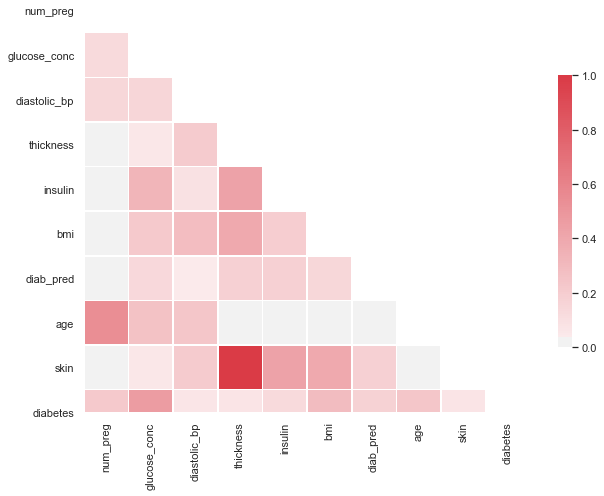

In [8]:
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
del df['skin']

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


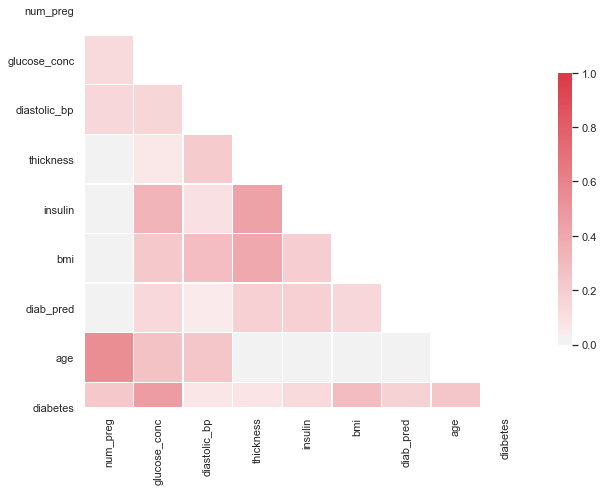

In [12]:
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Preprocessing Data

#### Convert all feature values into numeric

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [14]:
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

#### Check class distribution

In [15]:
num_obs = len(df)
num_true = len(df[df['diabetes'] == 1])
num_false = len(df[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


Distribution values are good, no need for adjusting.

#### Split dataset

In [16]:
X = df.drop(columns='diabetes').values
y = df['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

Check ratio of split

In [17]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [18]:
print("Original True: {0}, ({1:0.2f}%)".format((len(df[df['diabetes'] == 1])), (len(df[df['diabetes'] == 1])/ len(df.index))*100))
print("Original False: {0}, ({1:0.2f}%)".format((len(df[df['diabetes'] == 0])), (len(df[df['diabetes'] == 0])/ len(df.index))*100))
print("")
print("Training True: {0}, ({1:0.2f}%)".format((len(y_train[y_train[:] == 1])), (len(y_train[y_train[:] == 1])/(len(y_train))*100)))
print("Training False: {0}, ({1:0.2f}%)".format((len(y_train[y_train[:] == 0])), (len(y_train[y_train[:] == 0])/(len(y_train))*100)))
print("")
print("Test True: {0}, ({1:0.2f}%)".format((len(y_test[y_test[:] == 1])), (len(y_test[y_test[:] == 1])/ len(y_test))*100))
print("Test False: {0}, ({1:0.2f}%)".format((len(y_test[y_test[:] == 0])), (len(y_test[y_test[:] == 0])/ len(y_test))*100))

Original True: 268, (34.90%)
Original False: 500, (65.10%)

Training True: 188, (35.01%)
Training False: 349, (64.99%)

Test True: 80, (34.63%)
Test False: 151, (65.37%)


### Post split data preproccesing

#### Check for hidden missing values

In [19]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


How many rows has unexpected 0 values?

In [20]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


fill empty rows with mean of the column

In [21]:
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### Model: Random Forest

In [22]:
rf = RandomForestClassifier(random_state=42, n_estimators=10)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Predict train data

In [23]:
rf_predict_train = rf.predict(X_train)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy 0.9870


#### Predict test data

In [24]:
rf_predict_test = rf.predict(X_test)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy 0.7100


#### Check confusion matrix and classification report

In [25]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[121  30]
 [ 37  43]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



### Model: Logistic Regression

In [26]:
logreg = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
logreg.fit(X_train, y_train.ravel())
logreg_predict_test = logreg.predict(X_test)

In [27]:
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, logreg_predict_test)))
print(metrics.confusion_matrix(y_test, logreg_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, logreg_predict_test))

Accuracy 0.7446
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Set regularization parameter

1st max value of 0.613 occured at C=1.400


Text(0, 0.5, 'recall score')

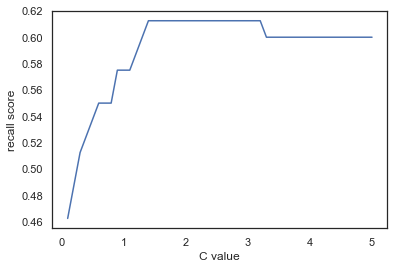

In [30]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    logreg_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    logreg_model_loop.fit(X_train, y_train.ravel())
    logreg_predict_loop_test = logreg_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, logreg_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_logreg_predict_test = logreg_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Logisitic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall scores')

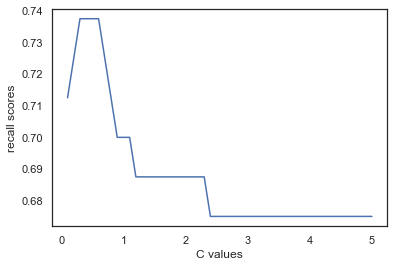

In [31]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    logreg_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    logreg_model_loop.fit(X_train, y_train.ravel())
    logreg_predict_loop_test = logreg_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, logreg_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_logreg_predict_test = logreg_predict_loop_test
    
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C values")
plt.ylabel("recall scores")

In [33]:
logreg = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
logreg.fit(X_train, y_train.ravel())
logreg_predict_test = logreg.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, logreg_predict_test)))
print(metrics.confusion_matrix(y_test, logreg_predict_test))
print("")
print(metrics.classification_report(y_test, logreg_predict_test))
print(metrics.recall_score(y_test, logreg_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


use LogisticRegressionCV

In [35]:
logreg_cv = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced",max_iter=500)
logreg_cv.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [38]:
logreg_cv_predict_test = logreg_cv.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, logreg_cv_predict_test)))
print(metrics.confusion_matrix(y_test, logreg_cv_predict_test))
print("")
print(metrics.classification_report(y_test, logreg_cv_predict_test))

Accuracy: 0.6883
[[107  44]
 [ 28  52]]

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       151
           1       0.54      0.65      0.59        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.69       231



#### use trained model to predict

In [55]:
joblib.dump(logreg_cv, "logreg_cv")

['logreg_cv']

In [56]:
#load model
logreg_cv = joblib.load("logreg_cv")

In [57]:
#load dataset
df_predict = pd.read_csv("pima-data-trunc.csv")

In [58]:
#clean data same as train dataset
del df_predict['skin']

In [59]:
X_predict = df_predict
del X_predict['diabetes']

In [60]:
#fill hidden empty rows
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_predict = fill_0.fit_transform(X_predict)

In [61]:
#predict with new data
logreg_cv.predict(X_predict)


array([0, 1, 0, 0])